# To-do
* Use the tools at hand to determine which clustering solution is best for the marathon data. 
> include number of clusters and algorithm used 

* Once you have a solution you like, write a data story
> include visualizations, where you teach the reader something about the Boston Marathon based on your clusters. 
> Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')
display(df.head())
print(df.columns)
print(df.shape)
print(df.dtypes)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')
(31984, 21)
10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object


In [3]:
df = df.dropna(axis=1, how='all')

In [4]:
df = df.drop('ctz', axis=1)

In [5]:
race_df = df.loc[:, ('5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official')]
print(race_df.shape)
cols = race_df.columns
df[cols] = race_df[cols].apply(pd.to_numeric, errors='coerce')

(31984, 9)


In [6]:
df.isnull().sum()

10k            50
name            0
division        0
25k           216
gender          0
age             0
official        0
bib             0
genderdiv       0
35k            34
overall         0
pace            0
state        2576
30k            40
5k             52
half           72
20k            51
country         0
city            1
40k            39
dtype: int64

In [7]:
print(df.shape)
df = df.dropna(subset=cols)
df.shape

(31984, 20)


(31649, 20)

In [8]:
df.isnull().sum()

10k             0
name            0
division        0
25k             0
gender          0
age             0
official        0
bib             0
genderdiv       0
35k             0
overall         0
pace            0
state        2546
30k             0
5k              0
half            0
20k             0
country         0
city            1
40k             0
dtype: int64

In [9]:
columns = df.columns.tolist()
col = columns[1:3] + columns[4:6] + columns[7:9] + cols.tolist() + columns[10:13] + columns[17:19]
df = df[col]

In [10]:
df.head()

,name,division,gender,age,bib,genderdiv,5k,10k,20k,half,25k,30k,35k,40k,official,overall,pace,state,country,city
0,"Yamamoto, Hiroyuki",8,M,47,W1,8,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,8,3.27,NaN,JPN,Fukuoka
1,"Jeptoo, Rita",1,F,33,F1,1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,21,5.30,NaN,KEN,Eldoret
2,"Van Dyk, Ernst F.",1,M,41,W2,1,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,1,3.08,NaN,RSA,Paarl
3,"Dibaba, Mare",3,F,24,F2,3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,27,5.37,NaN,ETH,Shoa
4,"Hokinoue, Kota",2,M,40,W3,2,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,2,3.10,NaN,JPN,Nogata Fukuoka


C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


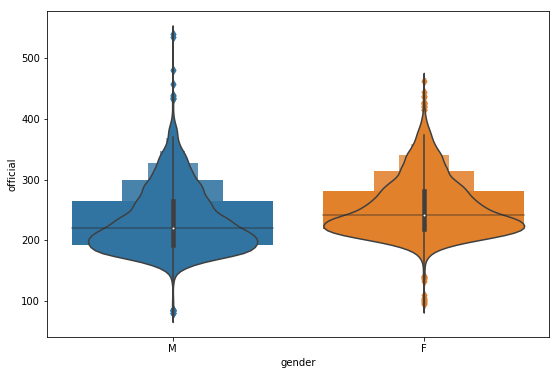

In [11]:
plt.figure(figsize=(9,6))
sns.boxenplot(x='gender', y='official', data=df, dodge=.1)
sns.violinplot(x='gender', y='official', data=df, dodge=.9)
plt.show()

In [12]:
df['Age Group'] = pd.cut(df['age'], [17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84], 
                         labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65,69', '70-74', '75-79', '80-84'])

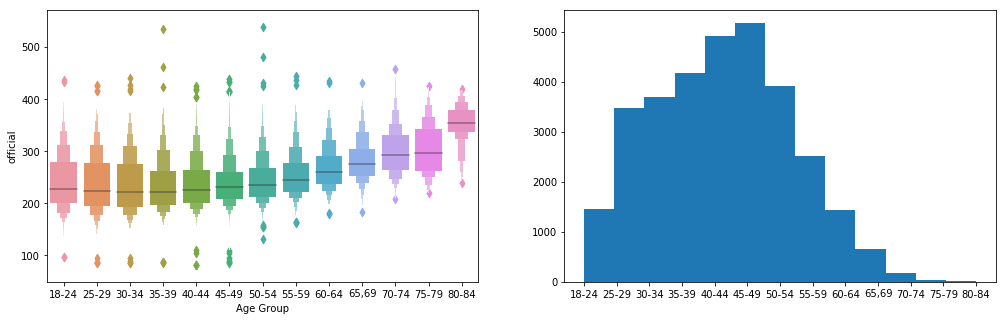

In [13]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.boxenplot(x='Age Group', y='official', data=df)
plt.subplot(122)
plt.hist(df['Age Group'], bins=13, align='mid')
plt.show()

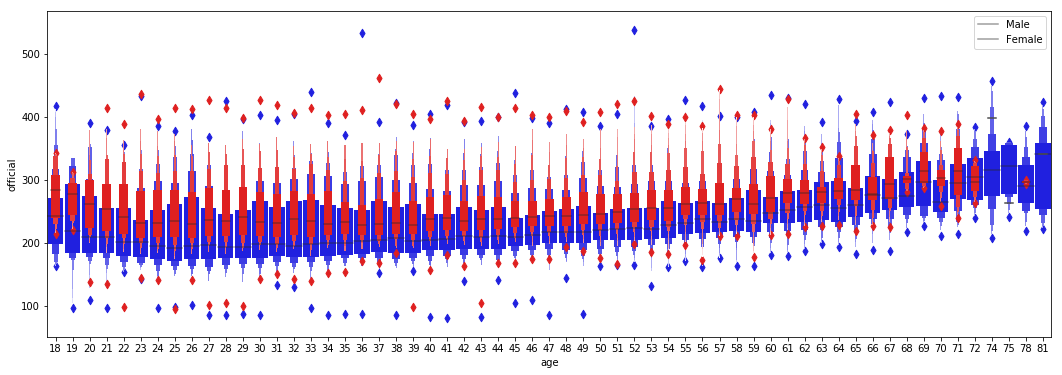

In [14]:
male_df = df.loc[df['gender']=='M']
female_df = df.loc[df['gender']=='F']
plt.figure(figsize=(18,6))
sns.boxenplot(x='age', y='official', data=male_df, color='b', width=.9)
sns.boxenplot(x='age', y='official', data=female_df, color='r', width=.5)
plt.legend(['Male', 'Female'])
plt.show()

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


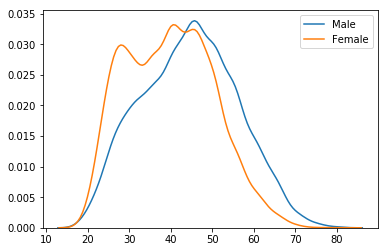

In [15]:
sns.kdeplot(male_df['age'] )
sns.kdeplot(female_df['age'])
plt.legend(['Male', 'Female'])
#There seemed to be more older males participating and more younger females

In [16]:
print("Male Runners:\n", male_df.describe())
print("Female Runners:\n", female_df.describe())

Male Runners:
            division           age     genderdiv            5k           10k  \
count  17484.000000  17484.000000  17484.000000  17484.000000  17484.000000   
mean    1732.874743     44.508751   8725.090254     24.638946     49.453316   
std     1453.925530     11.479024   5066.706817      4.299369      8.787573   
min        1.000000     18.000000      1.000000      7.750000     16.620000   
25%      601.000000     36.000000   4333.750000     21.430000     42.800000   
50%     1377.000000     45.000000   8723.500000     23.770000     47.650000   
75%     2375.000000     53.000000  13111.250000     27.550000     55.200000   
max     5911.000000     81.000000  17575.000000     86.950000    112.380000   

                20k          half           25k           30k           35k  \
count  17484.000000  17484.000000  17484.000000  17484.000000  17484.000000   
mean     100.585325    106.219979    127.477124    156.492220    187.537030   
std       19.080368     20.246703   

In [17]:
df['age'].describe()

count    31649.000000
mean        42.385067
std         11.299795
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64

In [18]:
print("Official finish time (minutes) information by gender:")
df.groupby('gender')['official'].describe()

Official finish time (minutes) information by gender:


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,14165.0,253.552444,46.569290,95.1,219.150,241.65,280.73,461.87
M,17484.0,232.554369,52.201563,80.6,193.115,219.84,264.13,538.88


In [19]:
df.loc[df['state'].isnull(), 'state'] = 'International'

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


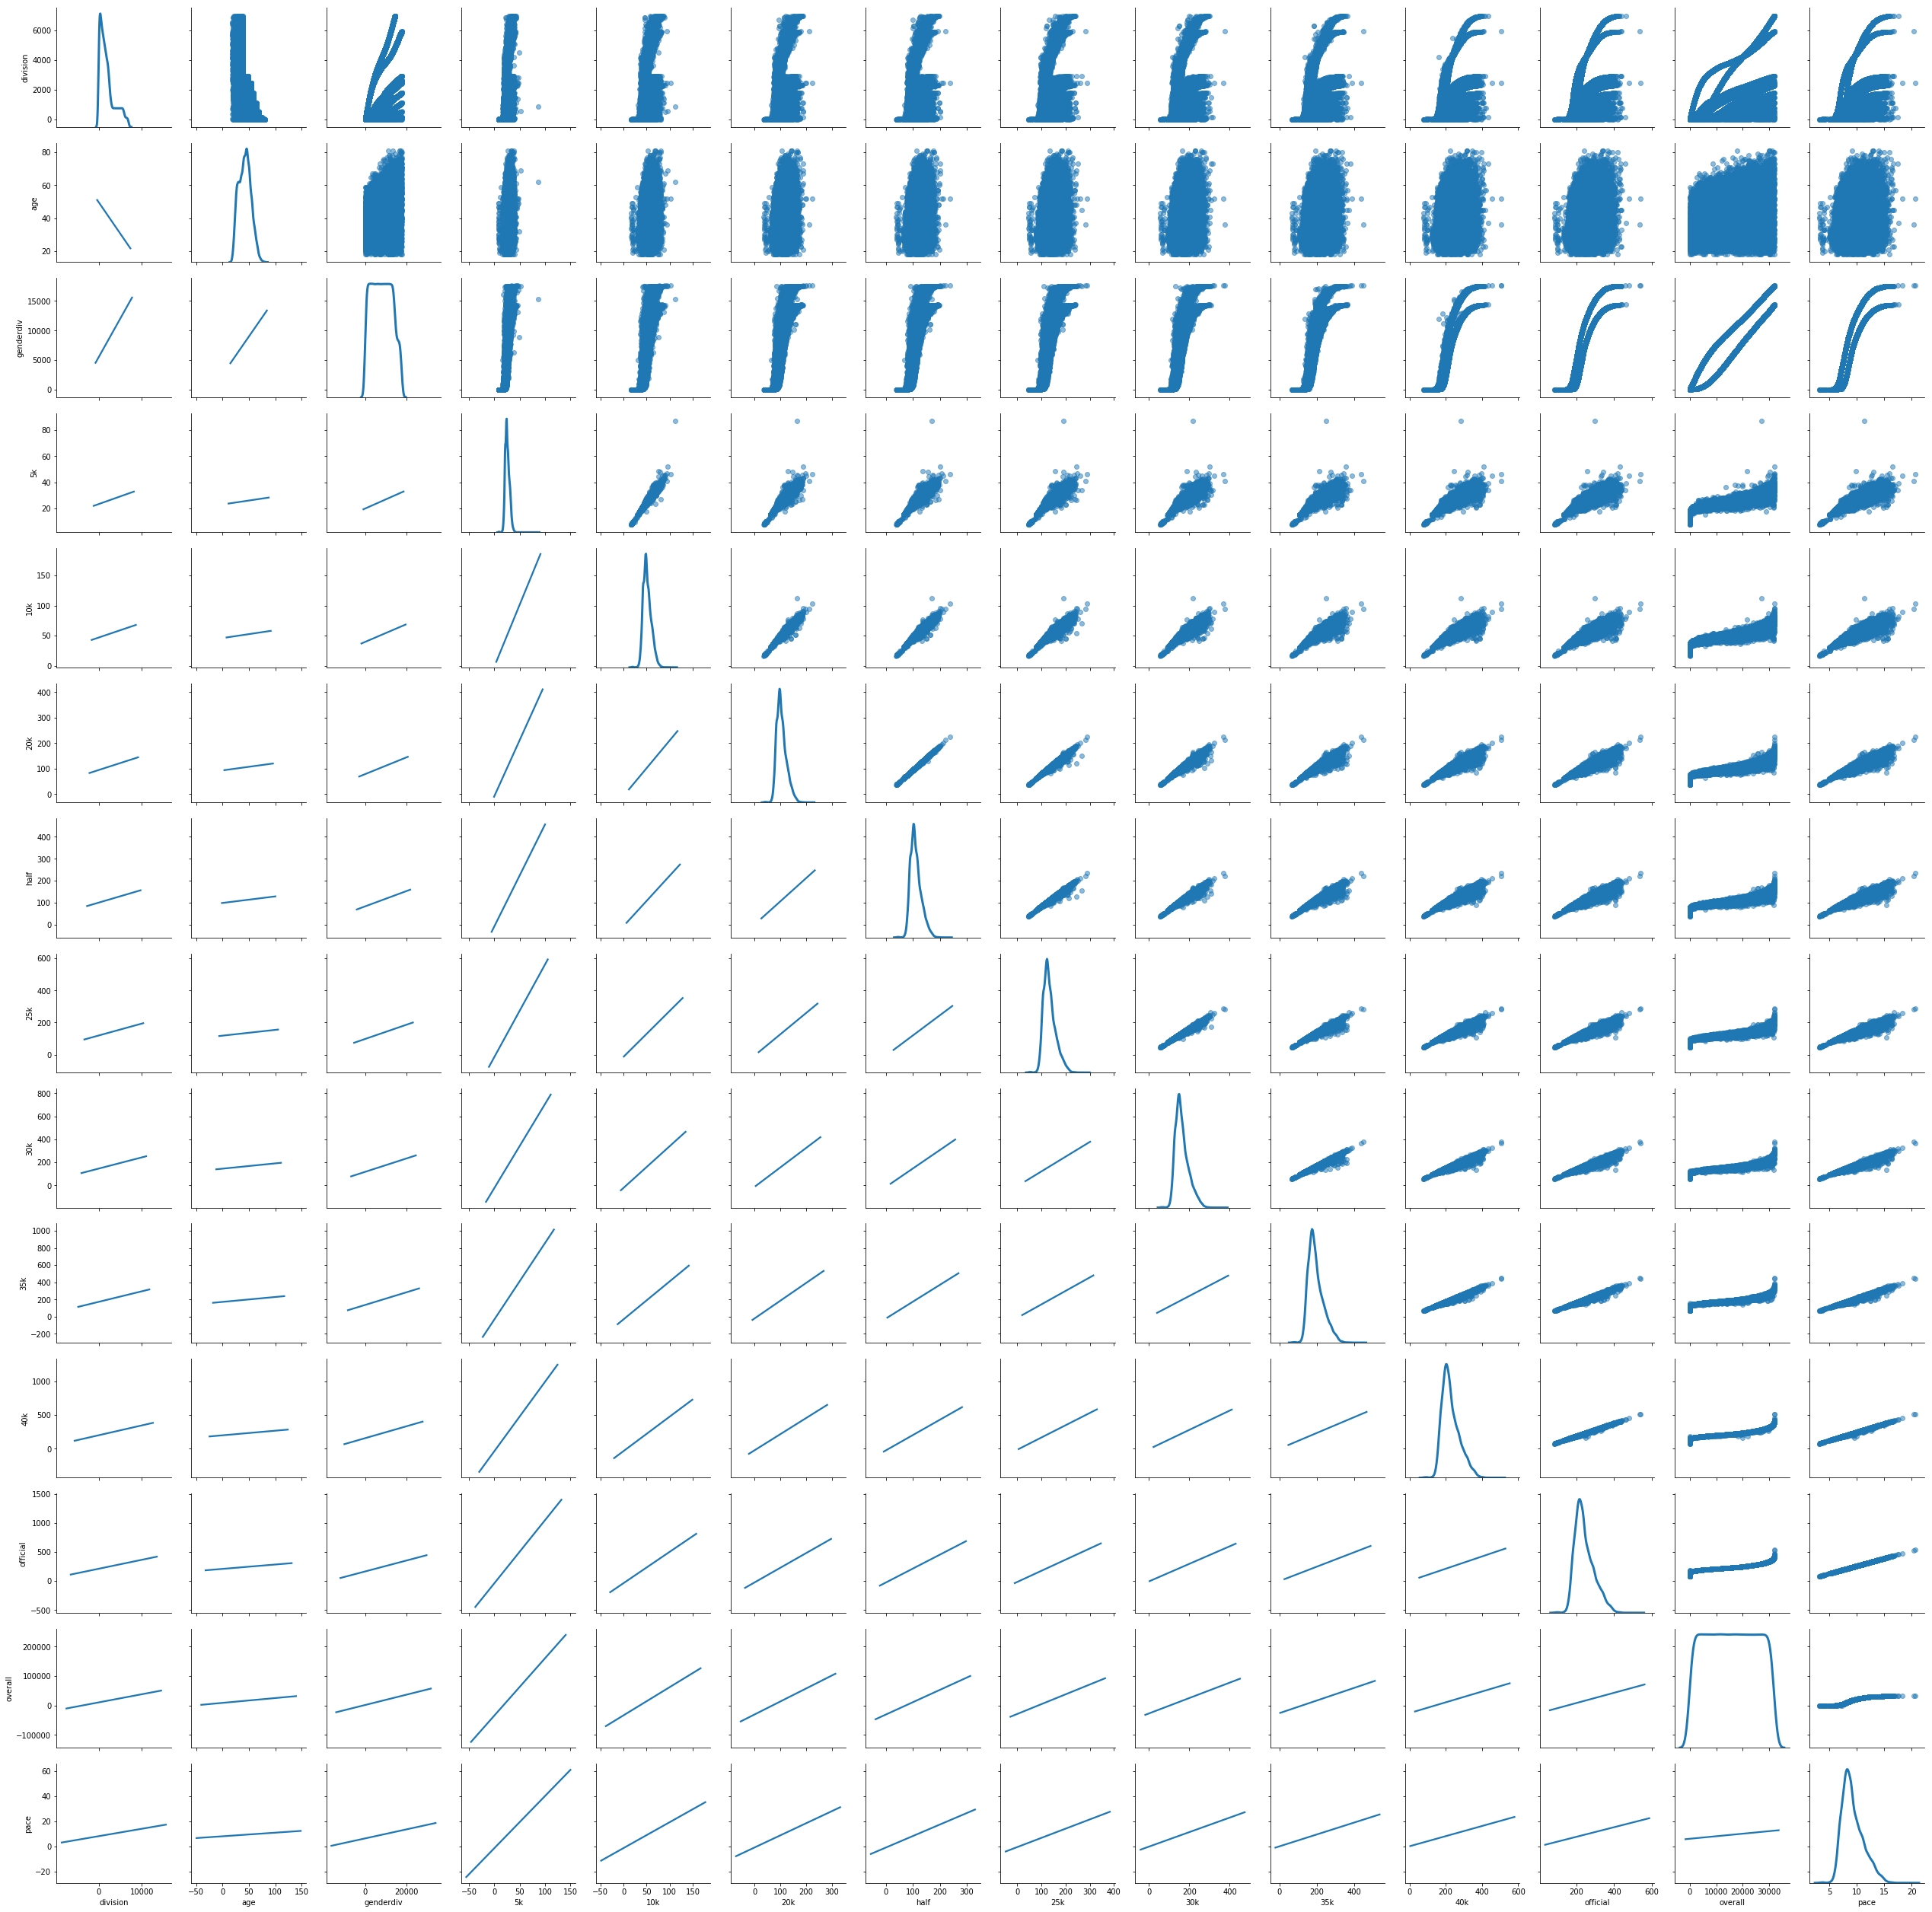

In [20]:
g = sns.PairGrid(data=df.select_dtypes(include='number'), diag_sharey=False)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
g.map_upper(plt.scatter, alpha=.5)
plt.show()

In [21]:
df['official'].describe()

count    31649.000000
mean       241.952383
std         50.842552
min         80.600000
25%        205.300000
50%        231.980000
75%        272.200000
max        538.880000
Name: official, dtype: float64

# Data Prep for modeling

In [22]:
dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], 1)
df = df.drop('gender', axis=1)

In [23]:
df.head()

,name,division,age,bib,genderdiv,5k,10k,20k,half,25k,...,40k,official,overall,pace,state,country,city,Age Group,F,M
0,"Yamamoto, Hiroyuki",8,47,W1,8,8.02,17.37,37.65,39.72,47.67,...,80.43,85.25,8,3.27,International,JPN,Fukuoka,45-49,0,1
1,"Jeptoo, Rita",1,33,F1,1,16.22,32.58,65.83,69.47,82.43,...,132.10,138.95,21,5.30,International,KEN,Eldoret,30-34,1,0
2,"Van Dyk, Ernst F.",1,41,W2,1,7.75,16.62,36.10,38.03,45.80,...,76.10,80.60,1,3.08,International,RSA,Paarl,40-44,0,1
3,"Dibaba, Mare",3,24,F2,3,16.20,32.57,65.83,69.47,82.43,...,132.95,140.58,27,5.37,International,ETH,Shoa,18-24,1,0
4,"Hokinoue, Kota",2,40,W3,2,8.02,17.12,36.58,38.60,46.37,...,76.72,81.23,2,3.10,International,JPN,Nogata Fukuoka,40-44,0,1


In [24]:
df.dtypes

name           object
division        int64
age             int64
bib            object
genderdiv       int64
5k            float64
10k           float64
20k           float64
half          float64
25k           float64
30k           float64
35k           float64
40k           float64
official      float64
overall         int64
pace          float64
state          object
country        object
city           object
Age Group    category
F               uint8
M               uint8
dtype: object

In [25]:
from sklearn.preprocessing import normalize
norm = normalize(df.select_dtypes(include='number', exclude='uint8'), norm='l2')
df_normed = pd.DataFrame(norm, index=df.index, columns=['division', 'age', 'genderdiv', '5k', '10k', '20k', 'half', '25k',
                                                     '30k', '35k', '40k', 'official', 'overall_position', 'pace'])

In [26]:
df_normed.head()

,division,age,genderdiv,5k,10k,20k,half,25k,30k,35k,40k,official,overall_position,pace
0,0.045897,0.269643,0.045897,0.046011,0.099653,0.216001,0.227877,0.273487,0.339520,0.409627,0.461433,0.489086,0.045897,0.018760
1,0.003558,0.117405,0.003558,0.057706,0.115911,0.234205,0.247155,0.293264,0.353389,0.414013,0.469976,0.494346,0.074712,0.018856
2,0.006098,0.249998,0.006098,0.047256,0.101340,0.220120,0.231888,0.279266,0.344204,0.411093,0.464020,0.491459,0.006098,0.018780
3,0.010641,0.085132,0.010641,0.057464,0.115531,0.233510,0.246421,0.292393,0.352340,0.412783,0.471595,0.498660,0.095773,0.019048
4,0.012106,0.242114,0.012106,0.048544,0.103625,0.221413,0.233640,0.280670,0.345194,0.410564,0.464374,0.491673,0.012106,0.018764


# K-means

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_n = list(range(2,12))
silh_score = []

for cluster in cluster_n:
    labels = KMeans(n_clusters=cluster, random_state=123).fit(df_normed).labels_
    score = silhouette_score(df_normed, labels, metric='euclidean', sample_size=20000)
    silh_score.append(score)

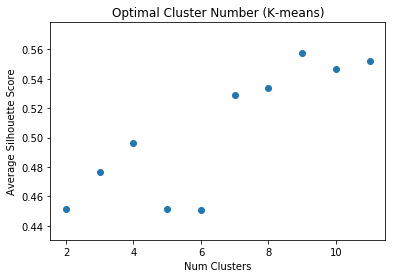

In [ ]:
plt.scatter(cluster_n, silh_score)
plt.xticks()
plt.xlabel("Num Clusters")
plt.ylabel("Average Silhouette Score")
plt.title("Optimal Cluster Number (K-means)")
plt.show()
#Judging from this, 9 clusters seems to produce the best results so far. Cluster

## Evaluating solution on 4 samples

In [ ]:
from sklearn.cluster import MeanShift

band = np.linspace(.1, .9, 9)
mean_shift_score = []
for band_width in band:
    mean_shift = MeanShift(bandwidth=band_width)
    labels_ms = mean_shift.fit(df_normed).labels_
    score_ms = silhouette_score(df_normed, labels_ms, metric='euclidean', sample_size=20000)
    mean_shift_score.append(score_ms)

In [ ]:
plt.scatter(band, score_ms)
plt.xlabel("Bandwidth")
plt.ylabel("Average Silhouette Score")
plt.title("Optimal Cluster Number (Mean-Shift)")
plt.show()